In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import random
from random import randint
import warnings
warnings.filterwarnings('ignore')
import torch
import matplotlib.cm as cm

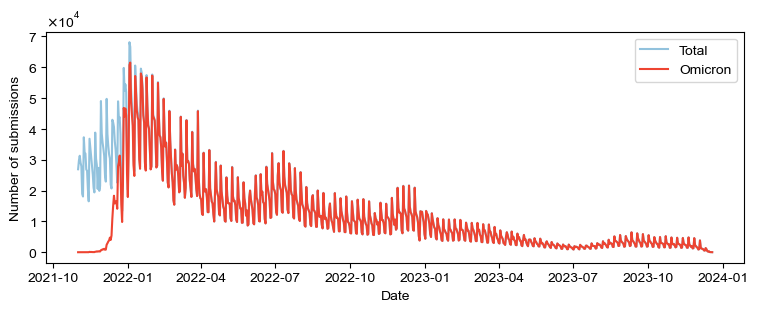

In [14]:
# plt.rcParams ['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']

df = pd.read_csv('./time_counts_1225.csv', header = 0)

time = pd.to_datetime(df['date'])

plt.figure(figsize=(9,3))

f = plt.plot(time, df['total'], color = '#92C2DD', lw=1.5, zorder=-9, label = 'Total')
plt.plot(time, df['Omicron'], color = '#EE4431', lw=1.5, zorder=-9, label = 'Omicron')

plt.ylabel('Number of submissions')
plt.xlabel('Date')
# plt.tick_params(labelsize=6)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.legend(loc="upper right")
plt.show()

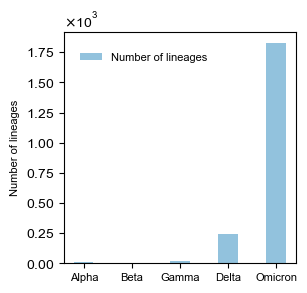

In [17]:
plt.rcParams['font.sans-serif'] = ['Arial']
x_label = ('Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron')
sigma_Eu = np.array([1211000, 44907, 135681, 4619093, 8877523])
sigma_Pu= np.array([8, 3, 22, 245, 1824])

bar_width = 0.2 
index_sigma_Eu = np.arange(len(sigma_Eu))/2 
# index_sigma_Pu = index_sigma_Eu + bar_width

fig=plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(111)
# ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width, label='Number of samples',color = '#EE4431')
ax1.bar(index_sigma_Eu, height=sigma_Pu, width=bar_width, label='Number of lineages',color = '#92C2DD')
ax1.legend(frameon=False,loc=(0.05,0.85), fontsize = 8)
# ax1.ylim([0, 10000000])
# ax1.set_ylabel('Number of samples', fontsize = 8)
ax1.set_ylabel('Number of lineages', fontsize = 8)
# ax1.set_xlabel('VOC', fontsize = 8)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.xticks(index_sigma_Eu + bar_width/2 -0.1 , x_label, fontsize = 8)
plt.show()

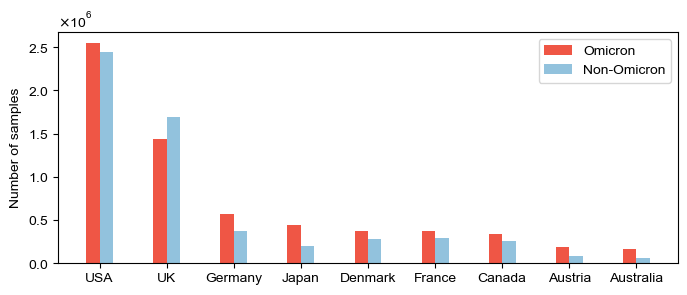

In [29]:
plt.rcParams['font.sans-serif'] = ['Arial']
df = pd.read_csv('./country_sample_stats.csv', header = 0)

plt.figure(figsize=(8,3))
x_label = df['Country'][0:9]
sigma_Eu = df['Omicron'][0:9]
sigma_Pu = df['Non-Omicron'][0:9]

bar_width = 0.2
index_sigma_Eu = np.arange(len(sigma_Eu)) 
index_sigma_Pu = index_sigma_Eu + bar_width 

plt.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width, label='Omicron', color = '#EE4431', alpha = 0.9)
plt.bar(index_sigma_Pu, height=sigma_Pu, width=bar_width, label='Non-Omicron', color = '#92C2DD')

plt.legend(loc="upper right")

plt.xticks(index_sigma_Eu + bar_width / 2, x_label)
# plt.ylim([0, 0.02])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.xlabel('Country')
plt.ylabel('Number of samples')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.show()

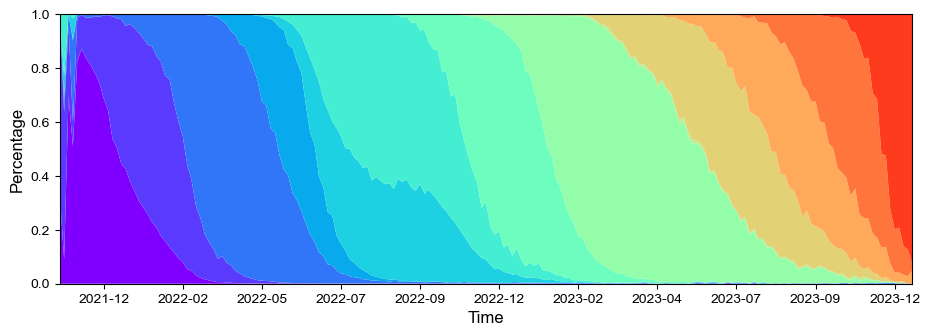

In [25]:
lineages = torch.load('./Omicron_experimental_data_new.pkl')['lineages']

df_counts_time = pd.read_csv('/Users/leizhongyi/Code/pyro/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

lineage = ['BA.1', 'BA.1.1', 'BA.2', 'BA.2.12.1', 'BA.5.1', 'BA.5.2.1', 'BQ.1.1', 'XBB.1.5', 'XBB.1.9', 'XBB.1.16', 'EG.5.1', 'HK.3', 'JN.1']
colors = cm.rainbow(np.arange(len(lineage))/len(lineage))

def get_counts(lineage_index):
    df_counts = pd.DataFrame(counts[:, lineage_index])
    return df_counts

def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

start = 0
counts = torch.load('./Omicron_experimental_data_new.pkl')['counts'].sum(1)
data = pd.DataFrame()
data['time'] = ''
data['time'] = time
for j in range(len(lineage)):
    data[lineage[j]] = ''
    data[lineage[j]] = get_counts(get_lineage_index(lineage))[j]
data['sum'] = ''
for i in range(len(data)):
    sum_all = 0
    for j in range(len(lineage)):
        sum_all = sum_all + data[lineage[j]][i]
    data['sum'][i] = sum_all
for i in range(len(data)):
    for j in range(len(lineage)):
        data[lineage[j]][i] = data[lineage[j]][i] / (data['sum'][i]+1e-20)
time = pd.to_datetime(data['time'])
plt.figure(figsize=(11,3.5))
plt.stackplot(time, data['BA.1'],data['BA.1.1'],data['BA.2'],data['BA.2.12.1'],data['BA.5.1'],data['BA.5.2.1'],data['BQ.1.1'],data['XBB.1.5'],data['XBB.1.9'],data['XBB.1.16'],data['EG.5.1'],data['HK.3'],data['JN.1'],  colors = colors)
plt.xlabel('Time', fontsize = 12) 
plt.ylabel('Percentage', fontsize = 12) 
plt.margins(0,0)

datetime_plot = []
string_plot = []
for i in range(len(data)):
    if i % 18 == 0:
        datetime_plot.append(time[start+10+i])
        string_plot.append(time[start+10+i].strftime('%Y-%m'))
plt.xticks(datetime_plot, string_plot)

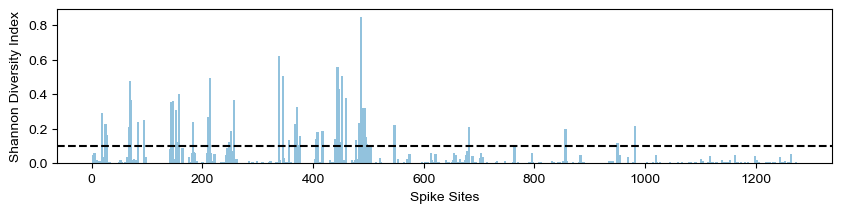

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']

plt.figure(figsize=(10,2))
df = pd.read_csv('./site_shannon.csv', header = 0)
bar_width = 4
for i in range(len(df)):
	plt.bar(df['site'][i], df['shannon'][i], width=bar_width, color = '#92C2DD')

plt.xlabel('Spike Sites')
plt.ylabel('Shannon Diversity Index')  # 纵坐标轴标题
# plt.ylabel('Sum Frequency', labelpad = 5)
plt.axhline(y = 0.1, color = 'black', linestyle = '--')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


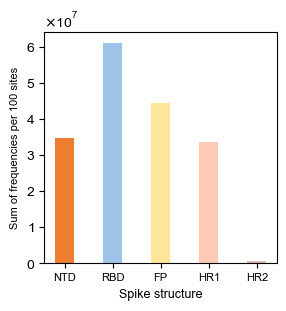

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']

# 输入统计数据
x_label = ('NTD', 'RBD', 'FP', 'HR1', 'HR2')
sigma_Eu = np.array([34780330, 60884300, 44309070, 33478120, 658230])
sigma_Pu= np.array([61, 10, 53, 315, 1235])

bar_width = 0.2 
index_sigma_Eu = np.arange(len(sigma_Eu))/2 
# index_sigma_Pu = index_sigma_Eu + bar_width 

fig=plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(111)
# ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width,color = '#92C2DD')
ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width,color = ['#ED7D31', '#9DC3E6', '#FFE699', '#FFC9B4', '#DAC0B7'])
# ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width,color = '#EE4431')
ax1.legend(frameon=False,loc=(0.05,0.85), fontsize = 8)
# ax1.ylim([0, 10000000])
# ax1.set_ylabel('Num of mutation types per 100 sites', fontsize = 9)
ax1.set_ylabel('Sum of frequencies per 100 sites', fontsize = 8)
ax1.set_xlabel('Spike structure', fontsize = 9)

plt.xticks(index_sigma_Eu + bar_width/2 -0.1 , x_label, fontsize = 8)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.show()

## Support

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


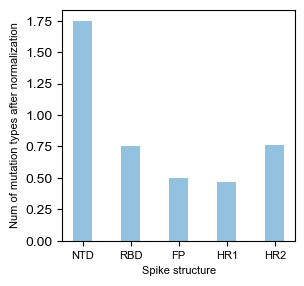

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']

x_label = ('NTD', 'RBD', 'FP', 'HR1', 'HR2')
# sigma_Eu = np.array([347803.3, 608843, 443090.7, 334781.2, 6582.3])
# sigma_Eu = np.array([6.51, 3.96, 7.67, 3.04, 4.84]) # freq>100
# sigma_Eu = np.array([8.6, 5.91, 5.94, 5.04, 6.3]) # freq>50
# sigma_Eu = np.array([2.8, 1.4, 1.05, 0.78, 1.46]) # freq>500
sigma_Eu = np.array([1.75, 0.75, 0.5, 0.47, 0.76]) # freq>1000
sigma_Pu= np.array([61, 10, 53, 315, 1235])

bar_width = 0.2  # 条形宽度
index_sigma_Eu = np.arange(len(sigma_Eu))/2 
# index_sigma_Pu = index_sigma_Eu + bar_width 

fig=plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(111)
ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width,color = '#92C2DD')
# ax1.bar(index_sigma_Eu, height=sigma_Eu, width=bar_width,color = '#EE4431')
ax1.legend(frameon=False,loc=(0.05,0.85), fontsize = 8)
# ax1.ylim([0, 10000000])
ax1.set_ylabel('Num of mutation types after normalization', fontsize = 8)
# ax1.set_ylabel('Sum of frequencies after normalization', fontsize = 8)
ax1.set_xlabel('Spike structure', fontsize = 8)

plt.xticks(index_sigma_Eu + bar_width/2 -0.1 , x_label, fontsize = 8)
plt.show()